<a href="https://colab.research.google.com/github/Sugandh-Mishra/attacks/blob/main/attacks/lbfgs_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing
import scipy
from sklearn import datasets, linear_model, preprocessing
from sklearn.datasets import fetch_openml
import matplotlib.image as mpimg
import skimage.io
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage.transform import resize
import matplotlib.patches as mpatches
from skimage import data
import skimage
import os.path
import random
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split as tts
import scipy
import scipy.optimize as opt
import re
import pandas as pd

In [2]:
def plt_digit(x):
    nrow = 28
    ncol = 28
    if isinstance(x, pd.core.series.Series):
        xsq = np.reshape(x.values, (nrow,ncol))    
    else:
      xsq = np.reshape(x, (nrow,ncol))
    plt.imshow(xsq,  cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])

In [3]:
def load_img(char_ind, samp_ind):
    """
    Returns the image from the dataset given a character and sample index.
    
        
    If the file doesn't exist, it raises an Exception with the filename.   
    """ 
    path='/Users/zhongda/Downloads/EnglishHnd/English/Hnd/Img/Sample'+str(char_ind).zfill(3)+'/'
    # TODO:  Set the file name based on char_ind and samp_ind
    # fname = ...
    fname='img'+str(char_ind).zfill(3)+'-'+str(samp_ind).zfill(3)+'.png'
    # TODO:  Use the os.path.isfile command to check if the file exists.  
    # If not raise an ImgException with the message "[fname] not found"
    img=[]
    if(os.path.isfile(path+fname)==False):
        em=fname+' not found'
        raise Exception(em)
    else:
        img=skimage.io.imread(path+fname)
    return img


In [4]:

def mnist_resize(img):
    """
    Extracts a character from the image, and places in a 28x28 image to match the MNIST format.
    
    Returns:
    img1:  MNIST formatted 28 x 28 size image with the character from img
    box:   A bounding box indicating the locations where the character was found in img.    
    """
    # Image sizes (fixed for now).  To match the MNIST data, the image 
    # will be first resized to 20 x 20.  Then, the image will be placed in center of 28 x 28 box
    # offet by 4 on each side.
    nx_img = 20   
    ny_img = 20
    nx_box = 28   
    ny_box = 28
    offx = 4
    offy = 4
    
    # TODO:  Convert the image to gray scale using the skimage.color.rgb2gray method.
    # bw = ...
    bw=skimage.color.rgb2gray(img)
    # Threshold the image using OTSU threshold
    thresh = threshold_otsu(bw)
    bw = closing(bw < thresh, square(3)).astype(int)
    
    # Get the regions in the image.
    # This creates a list of regions in the image where the digit possibly is.
    regions = regionprops(bw)

    # TODO:  Find region with the largest area.  You can get the region area from region.area.
    # region_max = ...
    area_max=0
    for i in range(len(regions)):
        if area_max<regions[i].area:
            region_max=regions[i]
    area_max=region_max.area
    # Raise an ImgException if no region with area >= 100 was found
    if (area_max < 100):
        raise Exception("No image found")    
                
    # Get the bounding box of the character from region_max.bbox
    minr, minc, maxr, maxc = region_max.bbox
    box = [minr,minc,maxr,maxc]
    
    # TODO:  Crop the image in bw to the bounding box
    # bw_crop = bw[...]
    bw_crop=bw[minr:maxr,minc:maxc]
        
    # TODO:  Resize the cropped image to a 20x20 using the resize command.
    # You will need to use the mode = 'constant' option
    # bw_resize = ...
    bw_resize=resize(bw_crop*1.0,[20,20],mode='constant')
    
    # TODO:  Threshold back to a 0-1 image by comparing the pixels to their mean value
    s=bw_resize-np.mean(bw_resize)
    img0=(s/abs(s)+1)/2
    # TODO:  Place extracted 20 x 20 image in larger image 28 x 28
    # img1 = ...
    img1=np.zeros([28,28])
    img1[4:24,4:24]=img0
    return img1, box

In [5]:
def fit_model(X,y):
    Xtr,Xts,ytr,yts=tts(X,y,test_size=1/6,random_state=0)
    svc.fit(Xtr,ytr)
    yhat_ts = svc.predict(Xts)
    acc = np.mean(yhat_ts == yts)
    print('Accuaracy = {0:f}'.format(acc))
    return acc

In [6]:
def Dis(x,x1):
    d=x-x1
    D=((d**2).sum())**0.5
    return D

In [7]:
def c_e(x1,y_prime):
    y1=[0,0,0,0,0,0,0,0,0,0]
    y1[y_prime]=1
    yh=svc.predict_proba([x1,x1])
    ce=-(y1*np.log(yh)).sum()
    return ce

In [8]:
def l_fun(x1,*args):
    x=args[0]
    y_prime=args[1]
    c=args[2]
    ly=svc.predict_proba([x1,x1])[0]
    l_f=c*Dis(x,x1)+c_e(x1,y_prime)
    return l_f

In [9]:
def L_BFGS_B(x,y_prime,c):
    
    initial=np.ones(len(x))
    x1=opt.fmin_l_bfgs_b(l_fun,x0=initial,args=(x,y_prime,c),approx_grad=True)
    x2=x1[0]
    D=Dis(x,x2)
    yh=svc.predict([x2,x2])
    return x2,yh[0],D

In [10]:
def check_int_input(value):
    try:
        re.match('^[0-9]{1}$', value)
    except:
        print("input is wrong, please enter a valid integer")

##################################################################################

In [11]:
#take custom input
while True:
    x_input = input("enter image number:")
    if(re.match('^[0-9]{1}$', x_input)):
        break
    else:
        print("input is wrong, please enter a valid integer: ")

while True:
    y_len = (input("how many different numbers you wanna attack: "))
    if(re.match('^[0-9]{1}$', y_len)):
        break
    else:
        print("input is wrong, please enter a valid integer")
        
y_input = []
for i in range(int(y_len)):
    while True:
        y_digit = input("enter the target label(eg.1,2,3): ")
        if(re.match('^[0-9]{1}$', y_digit)):
            break
        else:
            print("there should be integers in the list")
    y_input.append(int(y_digit))
           
while True:
    try:
        E = int(input("c value: "))
    except:
         print("input is wrong, please enter a valid integer")
    else:
        break


enter image number:5
how many different numbers you wanna attack: 3
enter the target label(eg.1,2,3): 8
enter the target label(eg.1,2,3): 9
enter the target label(eg.1,2,3): 0
c value: 0.01
input is wrong, please enter a valid integer
c value: 3000


In [12]:
#Initialization
digits = datasets.load_digits()
images = digits.images
labels = digits.target
images.shape
svc = svm.SVC(probability=True,  kernel="rbf", C=2.8, gamma=.0273)

mnist = fetch_openml('mnist_784', version=1)
mnist.data.shape

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)

In [13]:
#Load data and target
ndig=5000
ind=list(range(70000))
indn = random.sample(ind, ndig)

Xdig = mnist.data
ydig = mnist.target
ydig=ydig.astype('int64')
Xdig=Xdig*2/255-1

#X=Xdig[indn,:]
X=pd.DataFrame(Xdig, indn)
y=ydig[indn]
y=y.astype(int)

In [14]:
#fit the model and return the MNIST accuracy
print("start fitting the data")
acc = fit_model(X,y)

start fitting the data
Accuaracy = 0.772182


In [15]:
#initial data
x_num = int(x_input)
ind=np.where(y==x_num)[0]
num=random.choice(indn)
print(num)
x=X.loc[num,:]
print('y={}'.format(y[num]))
y_p=y_input
t_num=len(y_p)

33210
y=2


this is image of number to be changed
the y_prime is 0


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC 

C=6000
Bisection Search start!


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC 

C=3000.0


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC 

C=1500.0
the y_prime is 1


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC 

C=6000
Bisection Search start!


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC 

C=3000.0


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC 

C=1500.0
the y_prime is 2


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC 

C=6000
Bisection Search start!


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC 

C=3000.0


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC 

C=1500.0


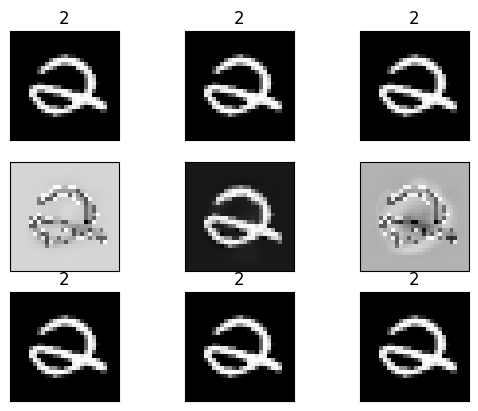

In [16]:
print("this is image of number to be changed")
# Plot the images using the subplot command
plt_digit(x)

for i in range(t_num):
    y_prime=y_p[i]
    print('the y_prime is {}'.format(i))
    #initalization C
    c =E
    while True:
        c = 2*c
        x_prime,yh,D  = L_BFGS_B(x,y_prime,c)
        print('C={}'.format(c))
        if (yh != y_prime):
            break
            
    ##Bisection Search
    print('Bisection Search start!')
    c_low = 0 
    c_high = c
    while True:

        c_half = (c_high+c_low)/2
        x_prime,yh,D_prime = L_BFGS_B(x,y_prime,c_half)
        print('C={}'.format(c_half))
        if (yh != y_prime):
            D = D_prime
            c_high = c_half
        else:
            c_low = c_half
        if ((c_high - c_low) < E):
            break
    title=svc.predict([x_prime,x])
    plt.subplot(3,t_num,i+1)
    plt_digit(x_prime)
    plt.title(title[0])
    plt.subplot(3,t_num,t_num+1+i)
    plt_digit(x_prime-x)
    plt.subplot(3,t_num,2*t_num+1+i)
    plt_digit(x)
    plt.title(title[1])

In [17]:
plt.savefig("result.png")

<Figure size 640x480 with 0 Axes>